# Curlometer Technique

This notebook shows how to calculate div(B), curl(B), total current, perpendicular and parallel currents using the curlometer technique. For more information on this technique, see: 

Chanteur, G., Spatial Interpolation for Four Spacecraft: Theory, Chapter 14 of Analysis methods for multi-spacecraft data, G. Paschmann and P. W. Daly (Eds.) ISSI Scientific Report SR-001. 

In [2]:
from pyspedas.mms import mec, fgm, curlometer
from pytplot import tplot

In [3]:
trange = ['2016-12-09/09:02', '2016-12-09/09:04']

Load the FGM data

In [4]:
fgm_vars = fgm(probe=[1, 2, 3, 4], trange=trange, data_rate='brst', time_clip=True, varformat='*_gse_*')

SDC username (blank for public access): 


26-Jan-22 22:14:54: Downloading mms1_fgm_brst_l2_20161209090054_v5.87.0.cdf to pydata/mms1/fgm/brst/l2/2016/12/09
26-Jan-22 22:14:55: Downloading mms1_fgm_brst_l2_20161209090304_v5.87.0.cdf to pydata/mms1/fgm/brst/l2/2016/12/09
26-Jan-22 22:14:55: Downloading mms2_fgm_brst_l2_20161209090054_v5.87.0.cdf to pydata/mms2/fgm/brst/l2/2016/12/09
26-Jan-22 22:14:55: Downloading mms2_fgm_brst_l2_20161209090304_v5.87.0.cdf to pydata/mms2/fgm/brst/l2/2016/12/09
26-Jan-22 22:14:55: Downloading mms3_fgm_brst_l2_20161209090054_v5.87.0.cdf to pydata/mms3/fgm/brst/l2/2016/12/09
26-Jan-22 22:14:55: Downloading mms3_fgm_brst_l2_20161209090304_v5.87.0.cdf to pydata/mms3/fgm/brst/l2/2016/12/09
26-Jan-22 22:14:55: Downloading mms4_fgm_brst_l2_20161209090054_v5.87.0.cdf to pydata/mms4/fgm/brst/l2/2016/12/09
26-Jan-22 22:14:56: Downloading mms4_fgm_brst_l2_20161209090304_v5.87.0.cdf to pydata/mms4/fgm/brst/l2/2016/12/09


Time clip was applied to: mms1_fgm_b_gse_brst_l2
Time clip was applied to: mms1_fgm_flag_brst_l2
Time clip was applied to: mms1_fgm_r_gse_brst_l2
Time clip was applied to: mms2_fgm_b_gse_brst_l2
Time clip was applied to: mms2_fgm_flag_brst_l2
Time clip was applied to: mms2_fgm_r_gse_brst_l2
Time clip was applied to: mms3_fgm_b_gse_brst_l2
Time clip was applied to: mms3_fgm_flag_brst_l2
Time clip was applied to: mms3_fgm_r_gse_brst_l2
Time clip was applied to: mms4_fgm_b_gse_brst_l2
Time clip was applied to: mms4_fgm_flag_brst_l2
Time clip was applied to: mms4_fgm_r_gse_brst_l2
That name is currently not in pytplot
That name is currently not in pytplot
That name is currently not in pytplot
That name is currently not in pytplot
That name is currently not in pytplot
That name is currently not in pytplot
That name is currently not in pytplot
That name is currently not in pytplot
That name is currently not in pytplot
That name is currently not in pytplot
That name is currently not in pytplo

Load the spacecraft position data

In [5]:
mec_vars = mec(probe=[1, 2, 3, 4], trange=trange, data_rate='brst', time_clip=True, varformat='*_r_gse')

26-Jan-22 22:14:59: Downloading mms1_mec_brst_l2_epht89q_20161209090055_v2.2.0.cdf to pydata/mms1/mec/brst/l2/epht89q/2016/12/09
26-Jan-22 22:15:00: Downloading mms1_mec_brst_l2_epht89q_20161209090305_v2.2.0.cdf to pydata/mms1/mec/brst/l2/epht89q/2016/12/09
26-Jan-22 22:15:00: Downloading mms2_mec_brst_l2_epht89q_20161209090055_v2.2.0.cdf to pydata/mms2/mec/brst/l2/epht89q/2016/12/09
26-Jan-22 22:15:00: Downloading mms2_mec_brst_l2_epht89q_20161209090305_v2.2.0.cdf to pydata/mms2/mec/brst/l2/epht89q/2016/12/09
26-Jan-22 22:15:01: Downloading mms3_mec_brst_l2_epht89q_20161209090055_v2.2.0.cdf to pydata/mms3/mec/brst/l2/epht89q/2016/12/09
26-Jan-22 22:15:01: Downloading mms3_mec_brst_l2_epht89q_20161209090305_v2.2.0.cdf to pydata/mms3/mec/brst/l2/epht89q/2016/12/09
26-Jan-22 22:15:01: Downloading mms4_mec_brst_l2_epht89q_20161209090055_v2.2.0.cdf to pydata/mms4/mec/brst/l2/epht89q/2016/12/09
26-Jan-22 22:15:01: Downloading mms4_mec_brst_l2_epht89q_20161209090305_v2.2.0.cdf to pydata/mms4

Time clip was applied to: mms1_mec_r_gse
Time clip was applied to: mms1_mec_r_gse2000
Time clip was applied to: mms2_mec_r_gse
Time clip was applied to: mms2_mec_r_gse2000
Time clip was applied to: mms3_mec_r_gse
Time clip was applied to: mms3_mec_r_gse2000
Time clip was applied to: mms4_mec_r_gse
Time clip was applied to: mms4_mec_r_gse2000
Loaded variables:
mms1_mec_r_gse
mms1_mec_r_gse2000
mms2_mec_r_gse
mms2_mec_r_gse2000
mms3_mec_r_gse
mms3_mec_r_gse2000
mms4_mec_r_gse
mms4_mec_r_gse2000


Note: if the position and fields variables are in GSE coordinates, the output vectors will be in GSE coordinates

In [6]:
positions = ['mms1_mec_r_gse', 'mms2_mec_r_gse', 'mms3_mec_r_gse', 'mms4_mec_r_gse']
fields = ['mms1_fgm_b_gse_brst_l2', 'mms2_fgm_b_gse_brst_l2', 'mms3_fgm_b_gse_brst_l2', 'mms4_fgm_b_gse_brst_l2']

In [7]:
curlometer_vars = curlometer(fields=fields, positions=positions)

tinterpol (linear) was applied to: mms2_fgm_b_gse_brst_l2_i
tinterpol (linear) was applied to: mms3_fgm_b_gse_brst_l2_i
tinterpol (linear) was applied to: mms4_fgm_b_gse_brst_l2_i
tinterpol (linear) was applied to: mms1_mec_r_gse_i
tinterpol (linear) was applied to: mms2_mec_r_gse_i
tinterpol (linear) was applied to: mms3_mec_r_gse_i
tinterpol (linear) was applied to: mms4_mec_r_gse_i


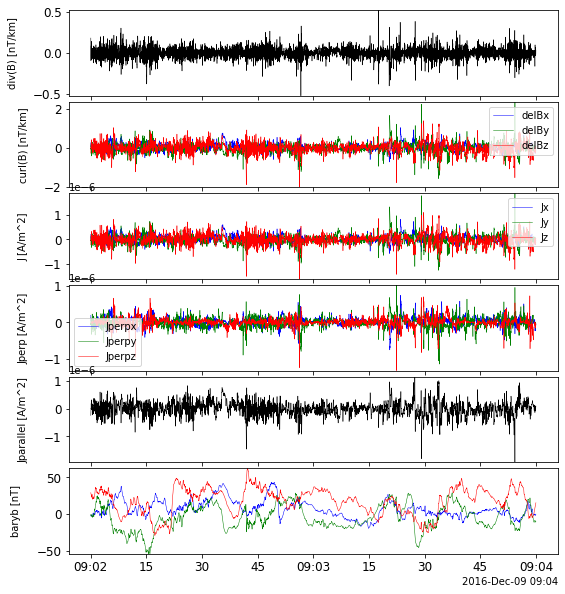

In [8]:
tplot(['divB', 'curlB', 'jtotal', 'jperp', 'jpar', 'baryb'])